# Temperature Forecast Project 

Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


We see that in our dataset there are a total of 7752 rows and 25 columns present. We see that right now all the information shown above is in numerical format and has no text data but we will need to investigate on it further. Also the problem statement says that we are suppose to predict two label columns namely "Next_Tmax" and "Next_Tmin". These target labels contain all continous data values in them so it makes this to be a Regression problem.

## Exploratory Data Analysis

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Using the info method we can see that there is only 1 column with object datatype and remaining 24 columns have float datatype values in them. The column which shows object datatype is actually for "Date" and we will have to treat it and convert it into numerical format. And as we can see that the null values present are very less compared to non null values so we will drop them

In [3]:
df.duplicated().sum()

0

From above we see that there are no duplicated values present in our datatset.

In [4]:
df.dropna(inplace=True)

In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7588.0,13.014101,7.217858,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7588.0,29.748366,2.967401,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7588.0,23.195809,2.400880,11.300000,21.600000,23.400000,24.800000,29.900000
LDAPS_RHmin,7588.0,56.724969,14.626559,19.794666,45.960243,55.023199,67.115099,98.524734
LDAPS_RHmax,7588.0,88.360823,7.199456,58.936283,84.203724,89.784122,93.742725,100.000153
LDAPS_Tmax_lapse,7588.0,29.620128,2.943496,17.624954,27.673756,29.709537,31.711109,38.542255
LDAPS_Tmin_lapse,7588.0,23.511786,2.342579,14.272646,22.086820,23.758249,25.155660,29.619342
LDAPS_WS,7588.0,7.094097,2.177034,2.882580,5.675358,6.547838,8.028960,21.857621
LDAPS_LH,7588.0,62.492606,33.686158,-13.603212,37.206201,56.898324,84.235666,213.414006
LDAPS_CC1,7588.0,0.368510,0.262260,0.000000,0.146546,0.315706,0.574174,0.967277


Using the describe method to check the numerical data details. Almost all the columns in our dataset has numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all properly distributed in terms of data points. However, I do see some outliers and skewness possibility that we will have to confirm with a visual on it.

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date', axis=1, inplace=True)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


We have splitted the Date column into day, month and year for visualisation purposes

## Visualisation

<Figure size 800x800 with 0 Axes>

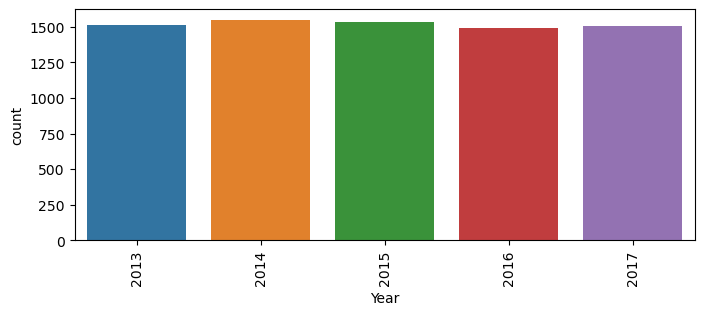

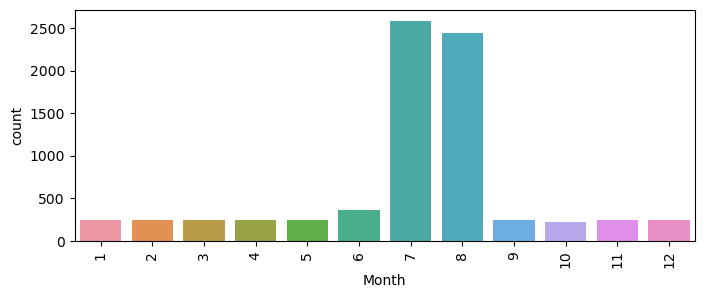

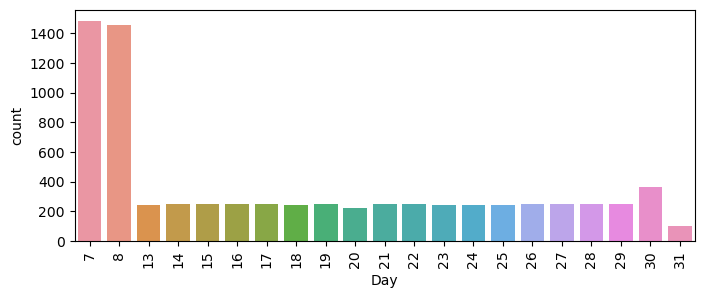

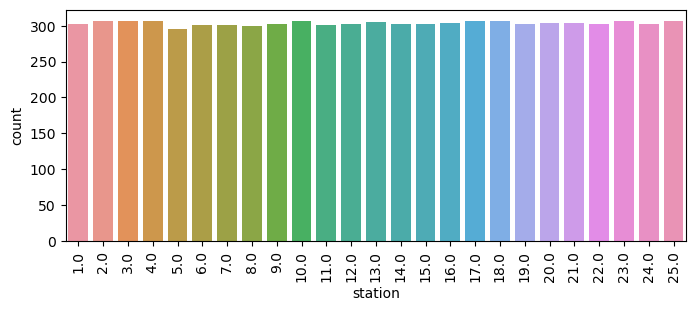

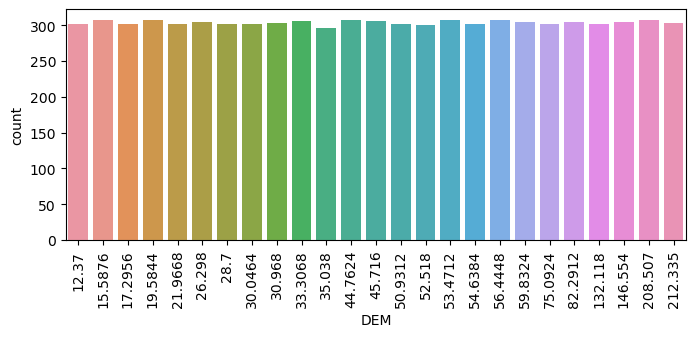

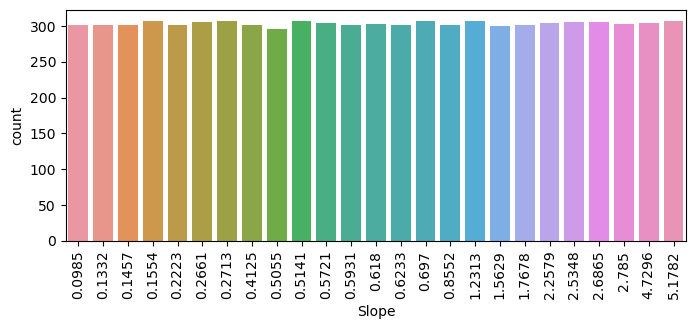

In [150]:
pt.figure(figsize=(8,8))
col1 = ['Year', 'Month', 'Day', 'station', 'DEM', 'Slope']
for i in col1:
    pt.figure(figsize=(8,3))
    sb.countplot(x=df[i])
    pt.xticks(rotation=90)
    pt.show()

We motice the following from above graphs-
1) Year shows that almost all year data points have equal coverage
2) Month shows a very high peak in data for months July and August
3) Day shows a very high peak in data for days 7 and 8 of a month
4) Station(25) also shows almost equal data coverage for all it's unique values
5) DEM(25) has almost equal data coverage for all it's unique values
6) Slope(27) again shows almost equal data coverage for all it's unique values

In [151]:
cols2=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

Scatter plot for Present_Tmax column with respect to the rows covered ->


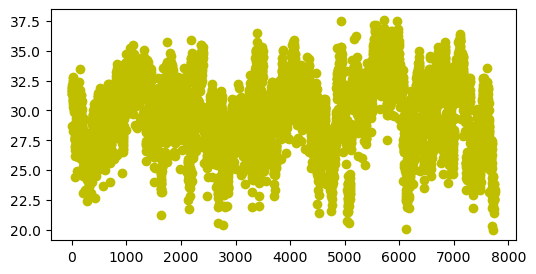

Scatter plot for Present_Tmin column with respect to the rows covered ->


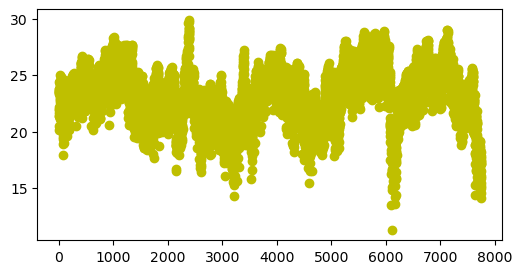

Scatter plot for LDAPS_RHmin column with respect to the rows covered ->


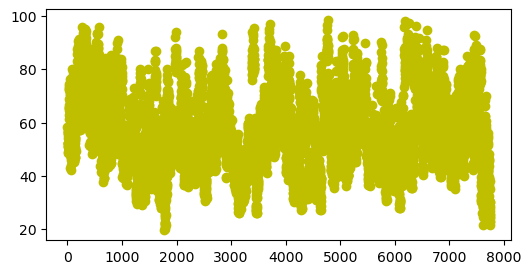

Scatter plot for LDAPS_RHmax column with respect to the rows covered ->


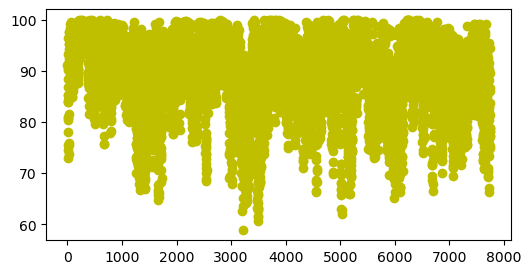

Scatter plot for LDAPS_Tmax_lapse column with respect to the rows covered ->


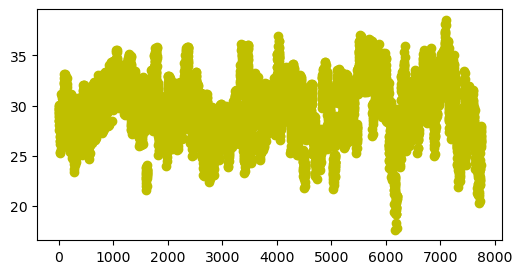

Scatter plot for LDAPS_Tmin_lapse column with respect to the rows covered ->


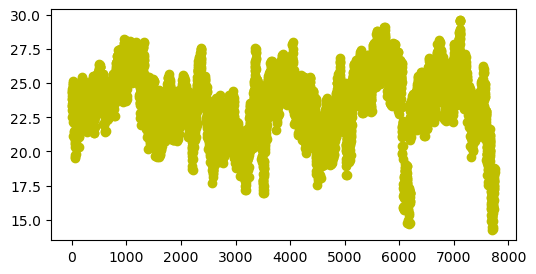

Scatter plot for LDAPS_WS column with respect to the rows covered ->


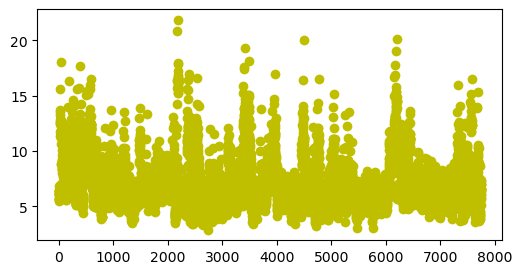

Scatter plot for LDAPS_LH column with respect to the rows covered ->


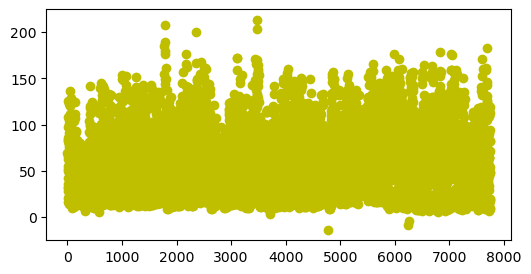

Scatter plot for LDAPS_CC1 column with respect to the rows covered ->


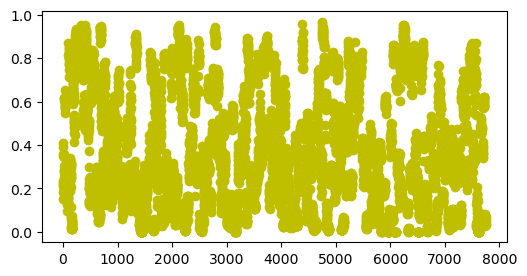

Scatter plot for LDAPS_CC2 column with respect to the rows covered ->


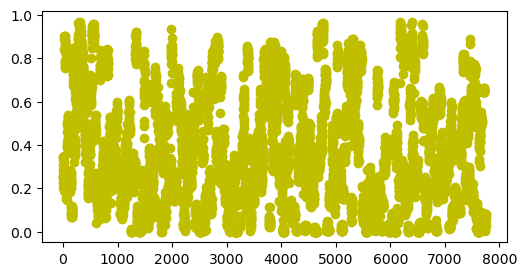

Scatter plot for LDAPS_CC3 column with respect to the rows covered ->


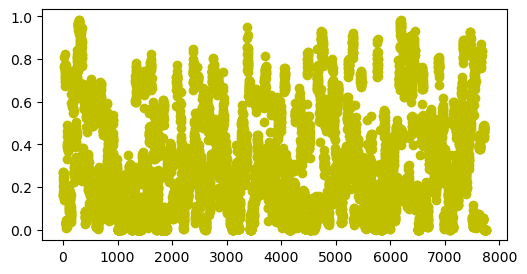

Scatter plot for LDAPS_CC4 column with respect to the rows covered ->


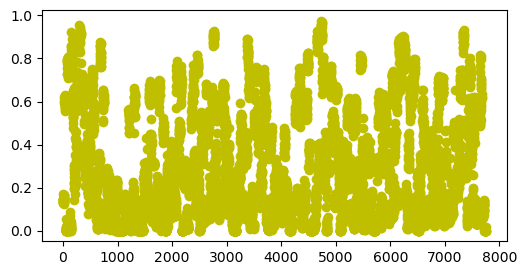

Scatter plot for LDAPS_PPT1 column with respect to the rows covered ->


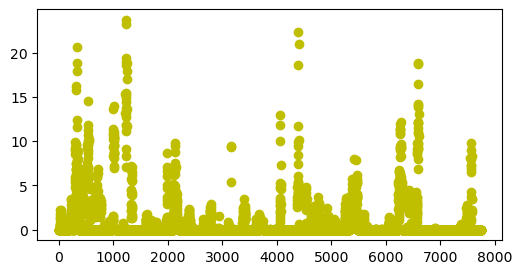

Scatter plot for LDAPS_PPT2 column with respect to the rows covered ->


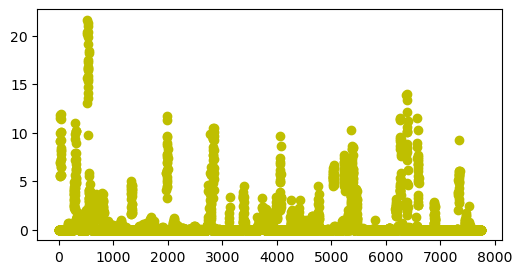

Scatter plot for LDAPS_PPT3 column with respect to the rows covered ->


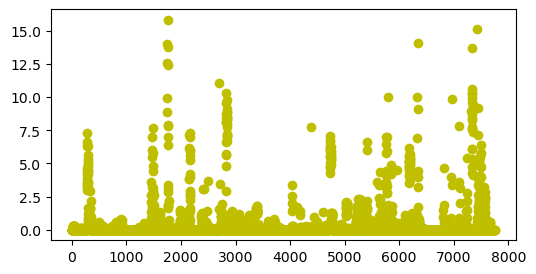

Scatter plot for LDAPS_PPT4 column with respect to the rows covered ->


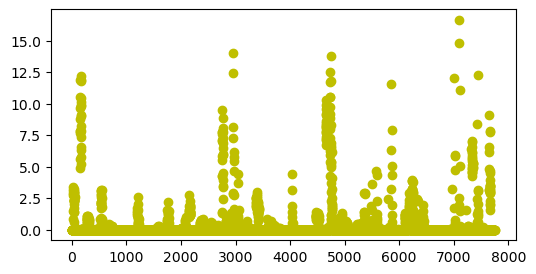

Scatter plot for Solar radiation column with respect to the rows covered ->


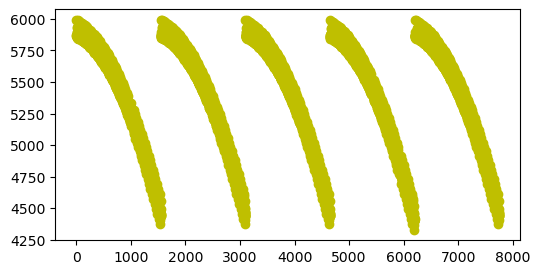

Scatter plot for Next_Tmax column with respect to the rows covered ->


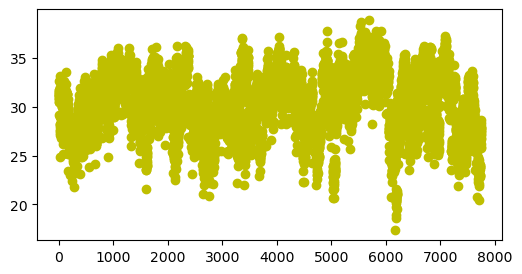

Scatter plot for Next_Tmin column with respect to the rows covered ->


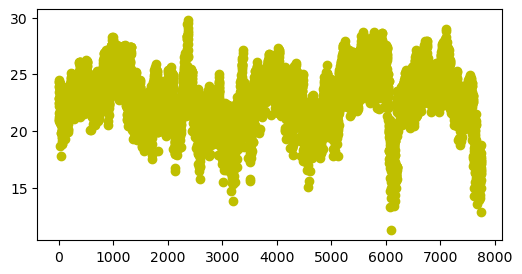

In [152]:
for i in df[cols2]:
    pt.figure(figsize=(6,3))
    print(f"Scatter plot for {i} column with respect to the rows covered ->")
    pt.scatter(df.index, df[i],color='y')
    pt.show()

In [153]:
feature_cols = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
                   'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 
                   'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation', 'Day', 
                   'Month', 'Year']
label_cols = ['Next_Tmax', 'Next_Tmin']

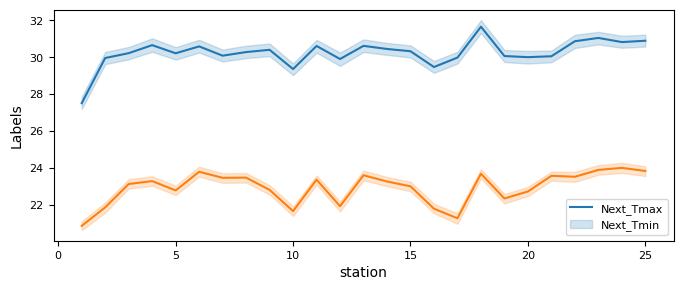

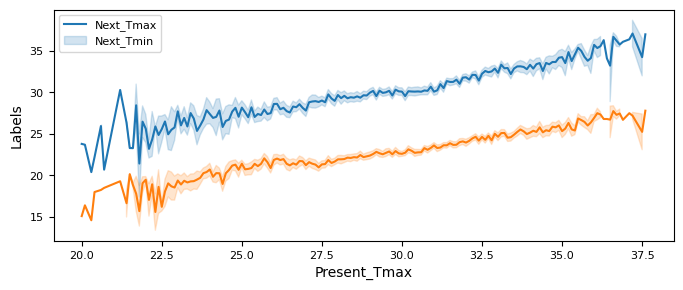

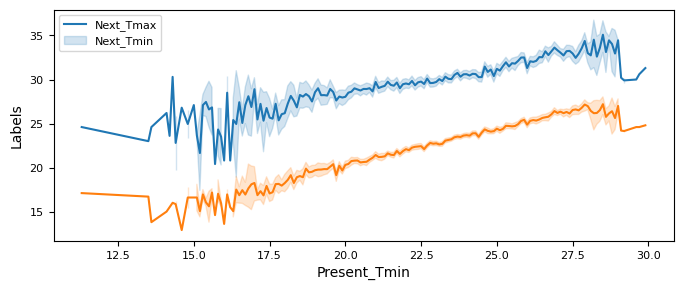

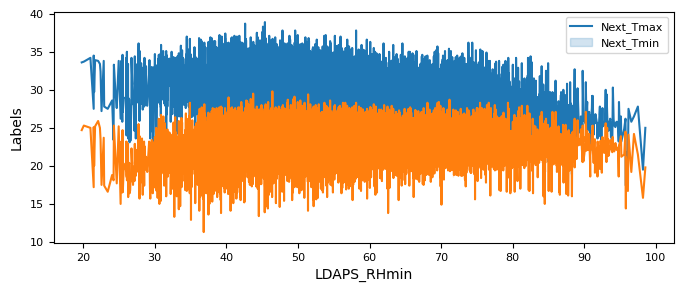

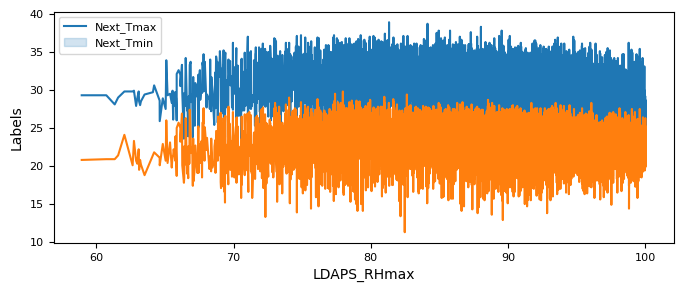

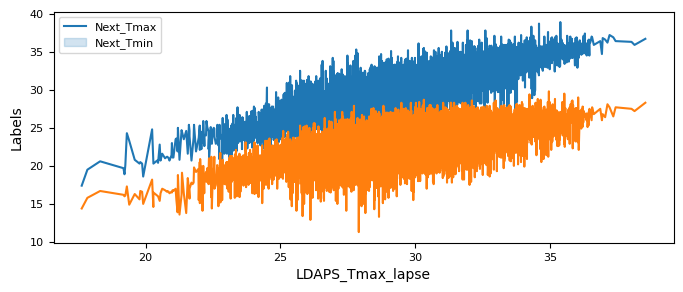

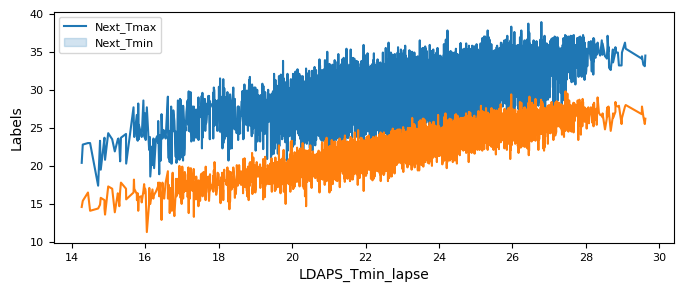

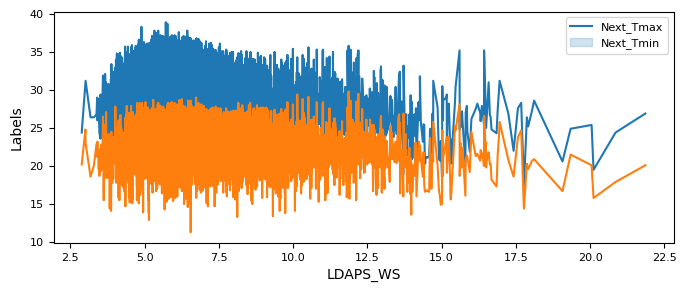

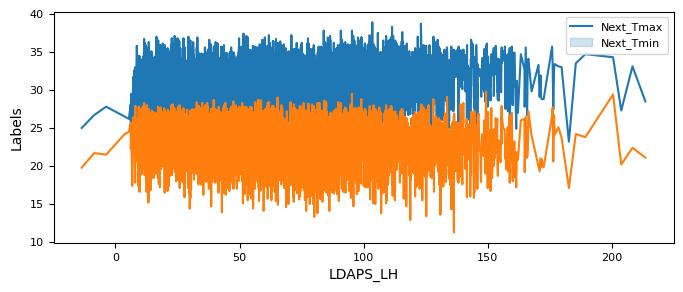

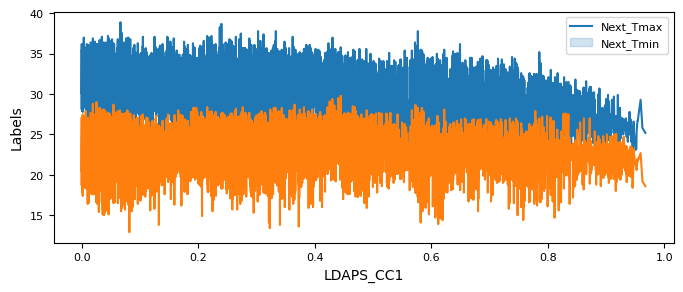

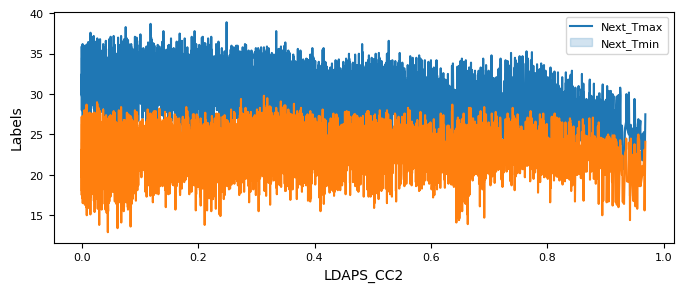

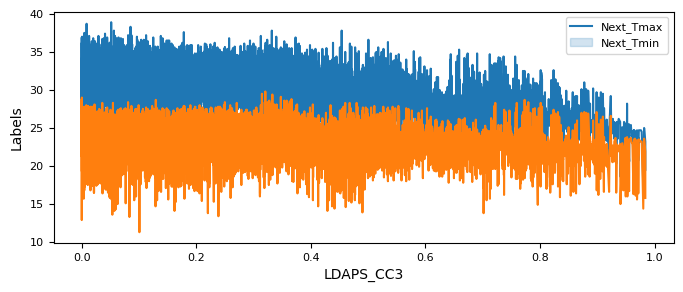

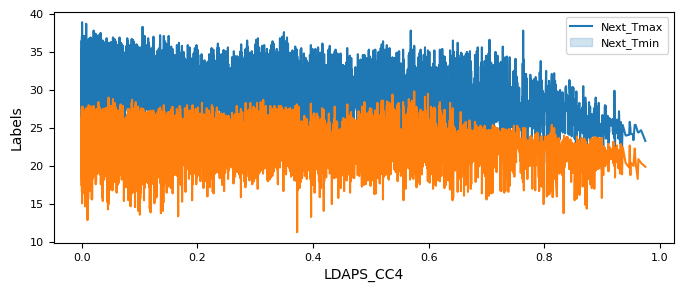

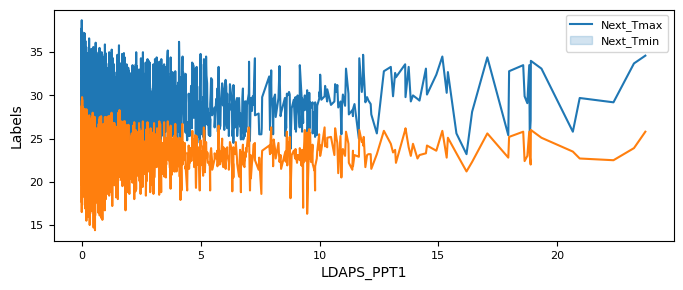

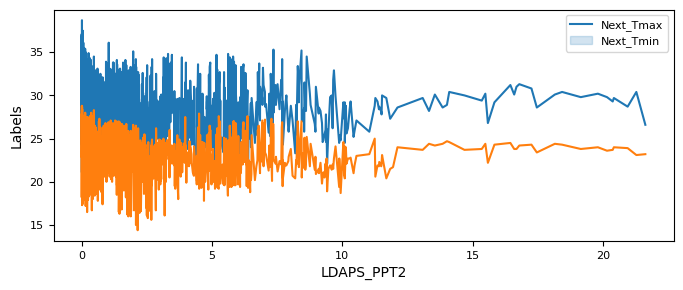

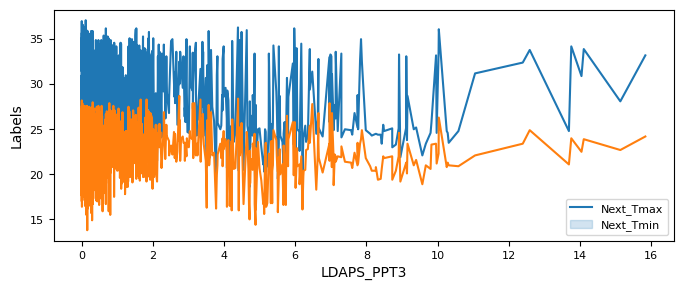

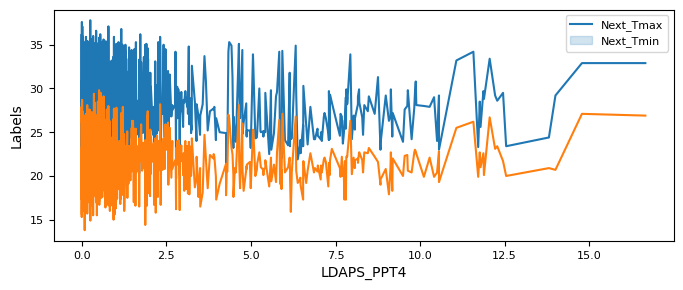

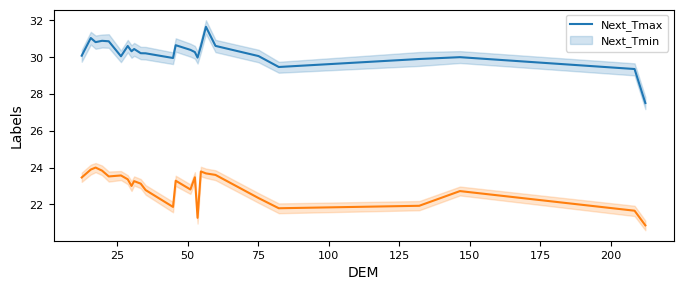

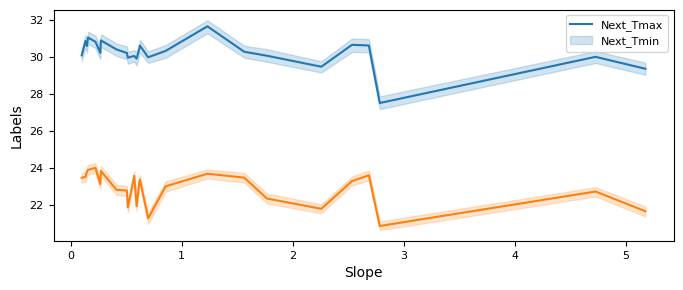

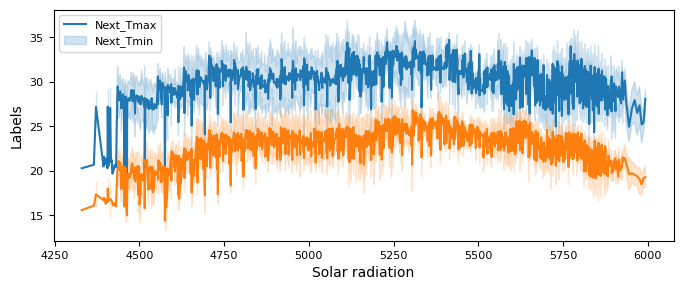

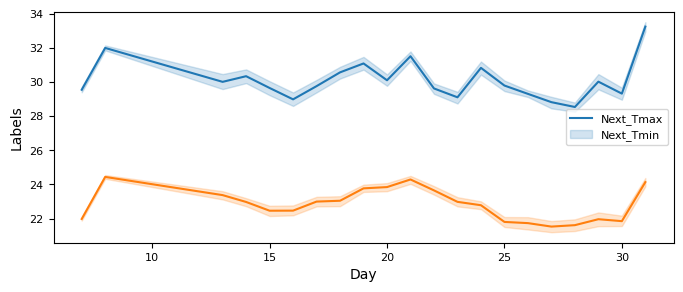

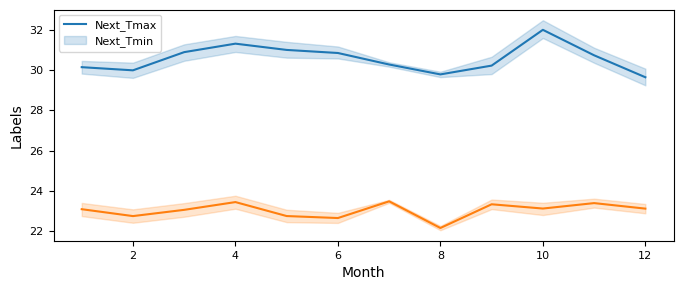

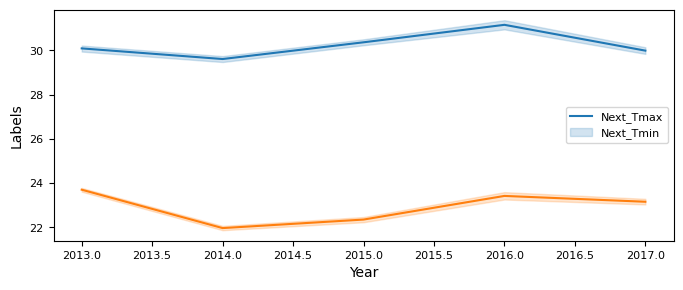

In [159]:
for z in df[feature_cols]:
    pt.figure(figsize=(8,3))
    sb.lineplot(x=df[z], y=label_cols[0], data=df)
    sb.lineplot(x=df[z], y=label_cols[1], data=df)
    pt.ylabel("Labels")
    pt.xticks(fontsize=8)
    pt.yticks(fontsize=8)
    pt.legend(['Next_Tmax', 'Next_Tmin'], fontsize=8)
    pt.show()

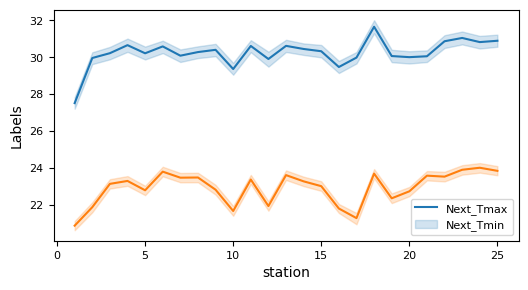

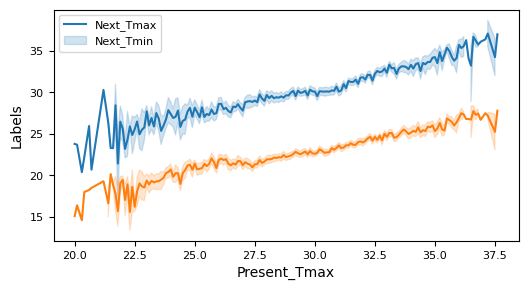

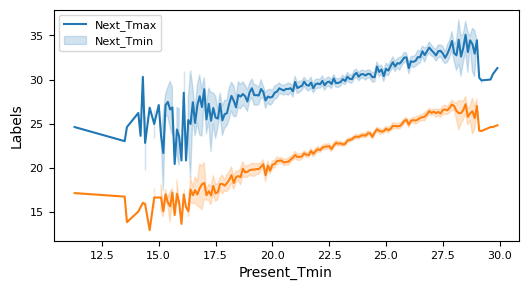

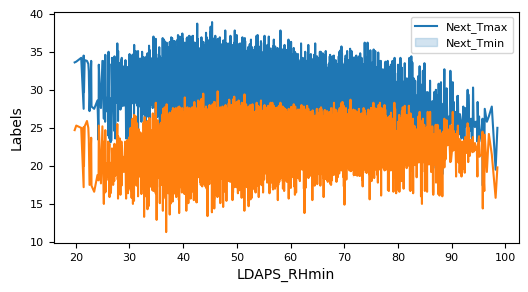

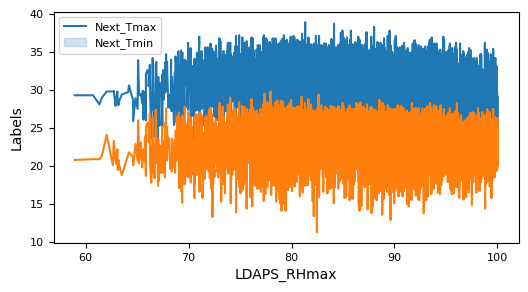

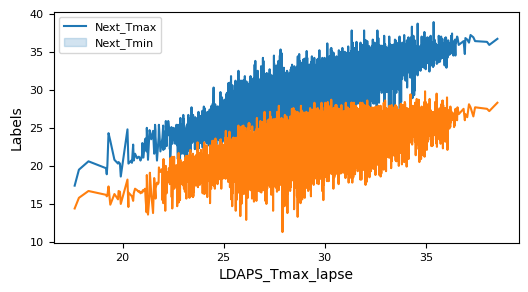

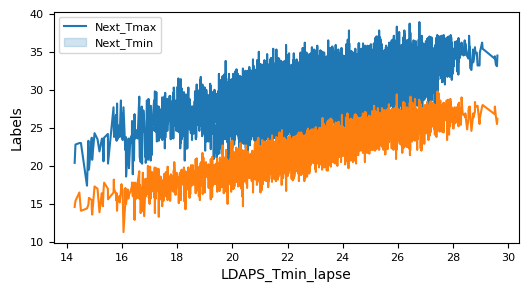

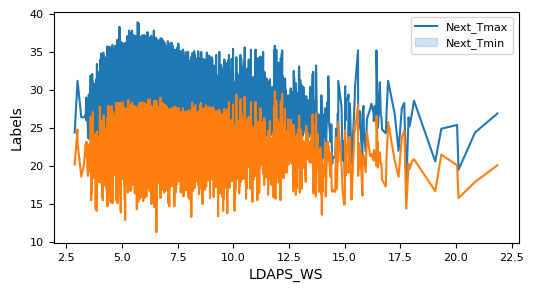

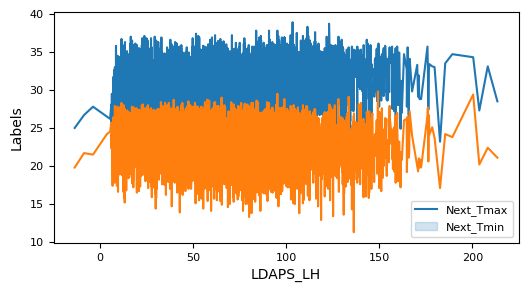

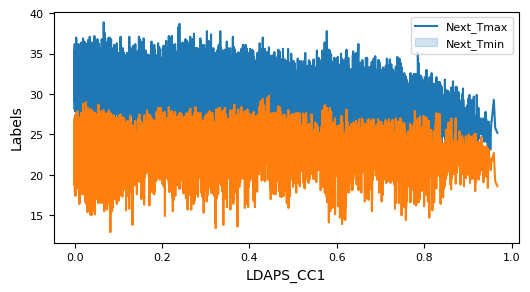

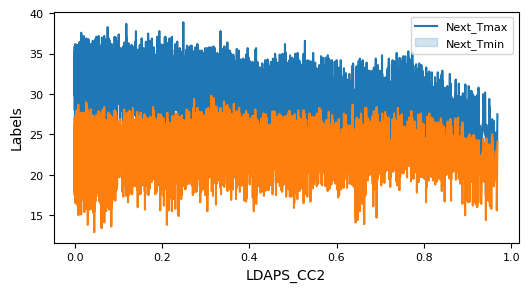

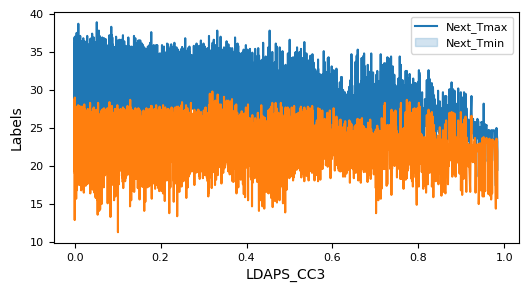

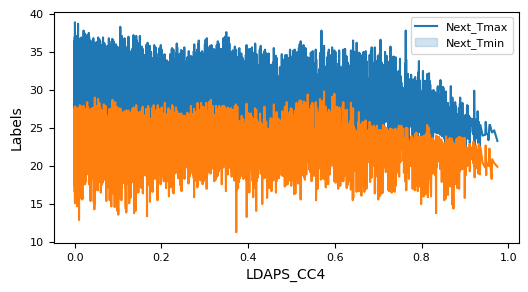

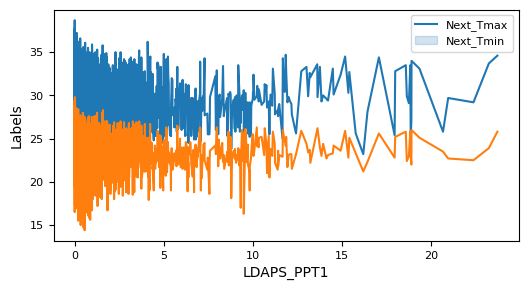

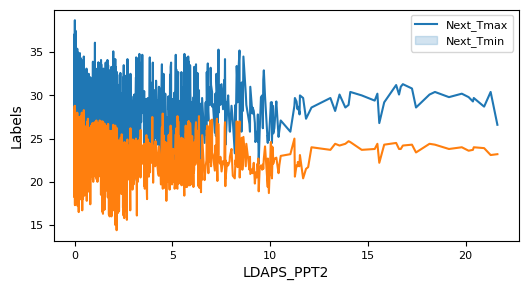

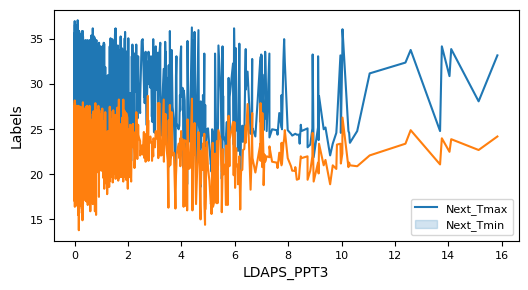

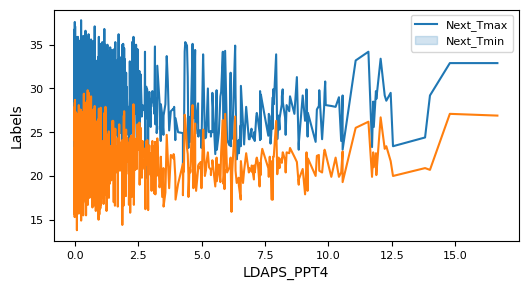

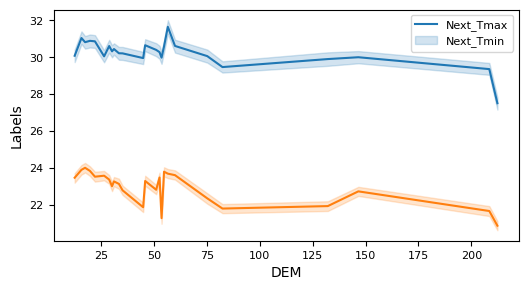

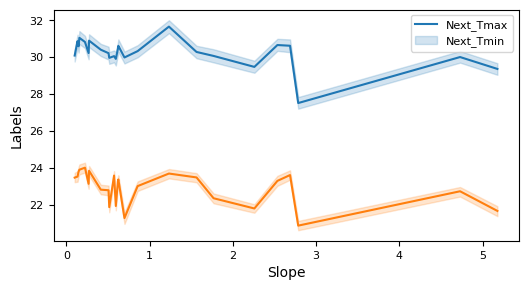

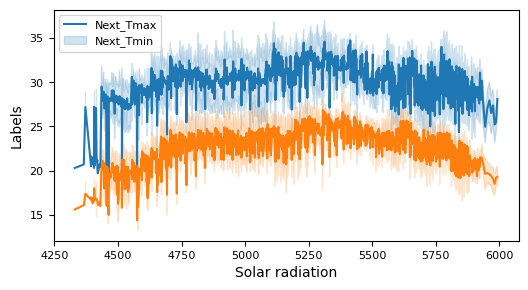

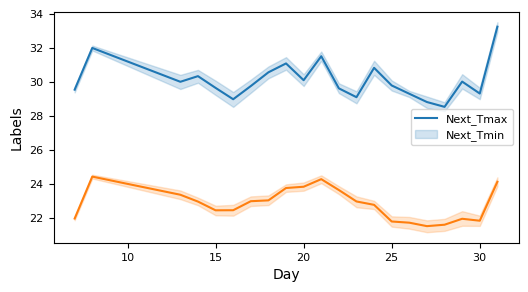

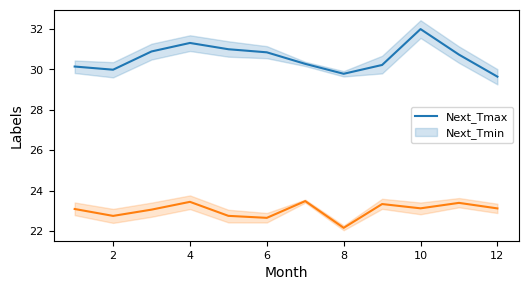

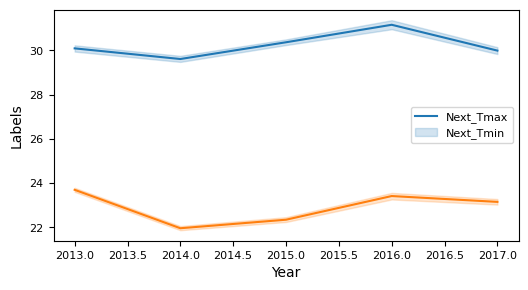

In [160]:
for i in df[feature_cols]:
    pt.figure(figsize=(6,3))
    sb.lineplot(x=df[i], y=label_cols[0], data=df)
    sb.lineplot(x=df[i], y=label_cols[1], data=df)
    pt.ylabel("Labels")
    pt.xticks(fontsize=8)
    pt.yticks(fontsize=8)
    pt.legend(['Next_Tmax', 'Next_Tmin'], fontsize=8)
    pt.show()

## Checking and removing outliers using Zscore

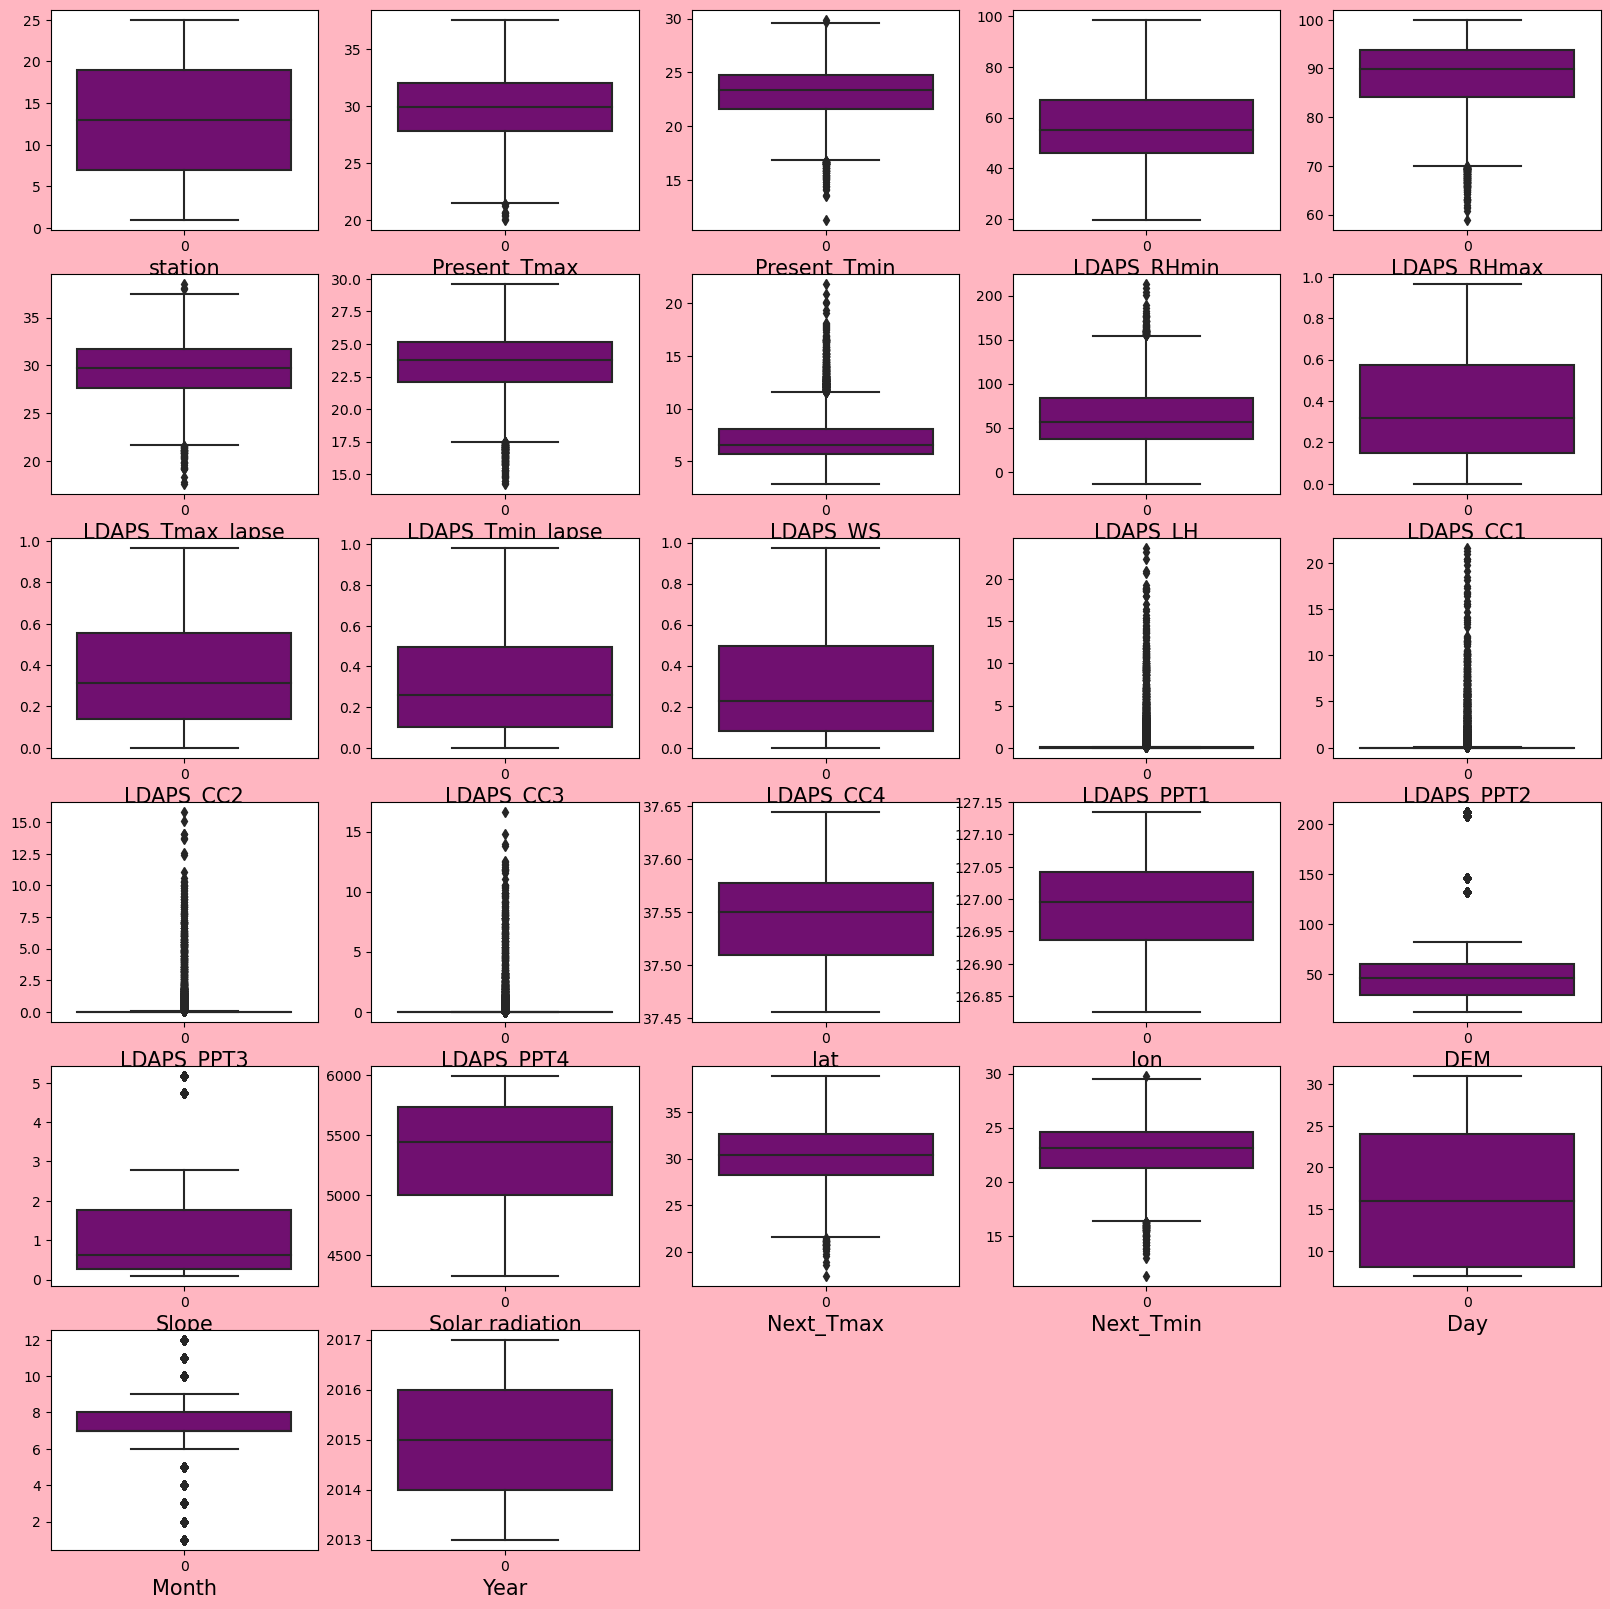

In [161]:
pt.figure(figsize=(20,20),facecolor='lightpink')
p=1
for c in df:
    if p<=28:
        ax=pt.subplot(6,5,p)
        sb.boxplot(df[c],color='purple')
        pt.xlabel(c,fontsize=15)
    p+=1

In [7]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (7588, 27)
Shape of the dataframe after removing outliers:  (6739, 27)
Percentage of data loss post outlier removal:  11.188719030047443


If we take threshold value of 3 the data loss is more than the acceptance range but not by a great margin as the acceptable range is 10% so we willcontinue to remove the outliers.

## Checking and removing Skewness

station            -0.003134
Present_Tmax       -0.295735
Present_Tmin       -0.300269
LDAPS_RHmin         0.317694
LDAPS_RHmax        -0.759415
LDAPS_Tmax_lapse   -0.143238
LDAPS_Tmin_lapse   -0.476199
LDAPS_WS            1.157554
LDAPS_LH            0.613055
LDAPS_CC1           0.564380
LDAPS_CC2           0.499229
LDAPS_CC3           0.693125
LDAPS_CC4           0.703111
LDAPS_PPT1          3.788606
LDAPS_PPT2          4.721503
LDAPS_PPT3          5.523137
LDAPS_PPT4          5.973295
lat                 0.095423
lon                -0.279686
DEM                 1.739074
Slope               1.579401
Solar radiation    -0.523191
Next_Tmax          -0.292374
Next_Tmin          -0.313213
Day                 0.246323
Month              -0.685973
Year                0.011720
dtype: float64

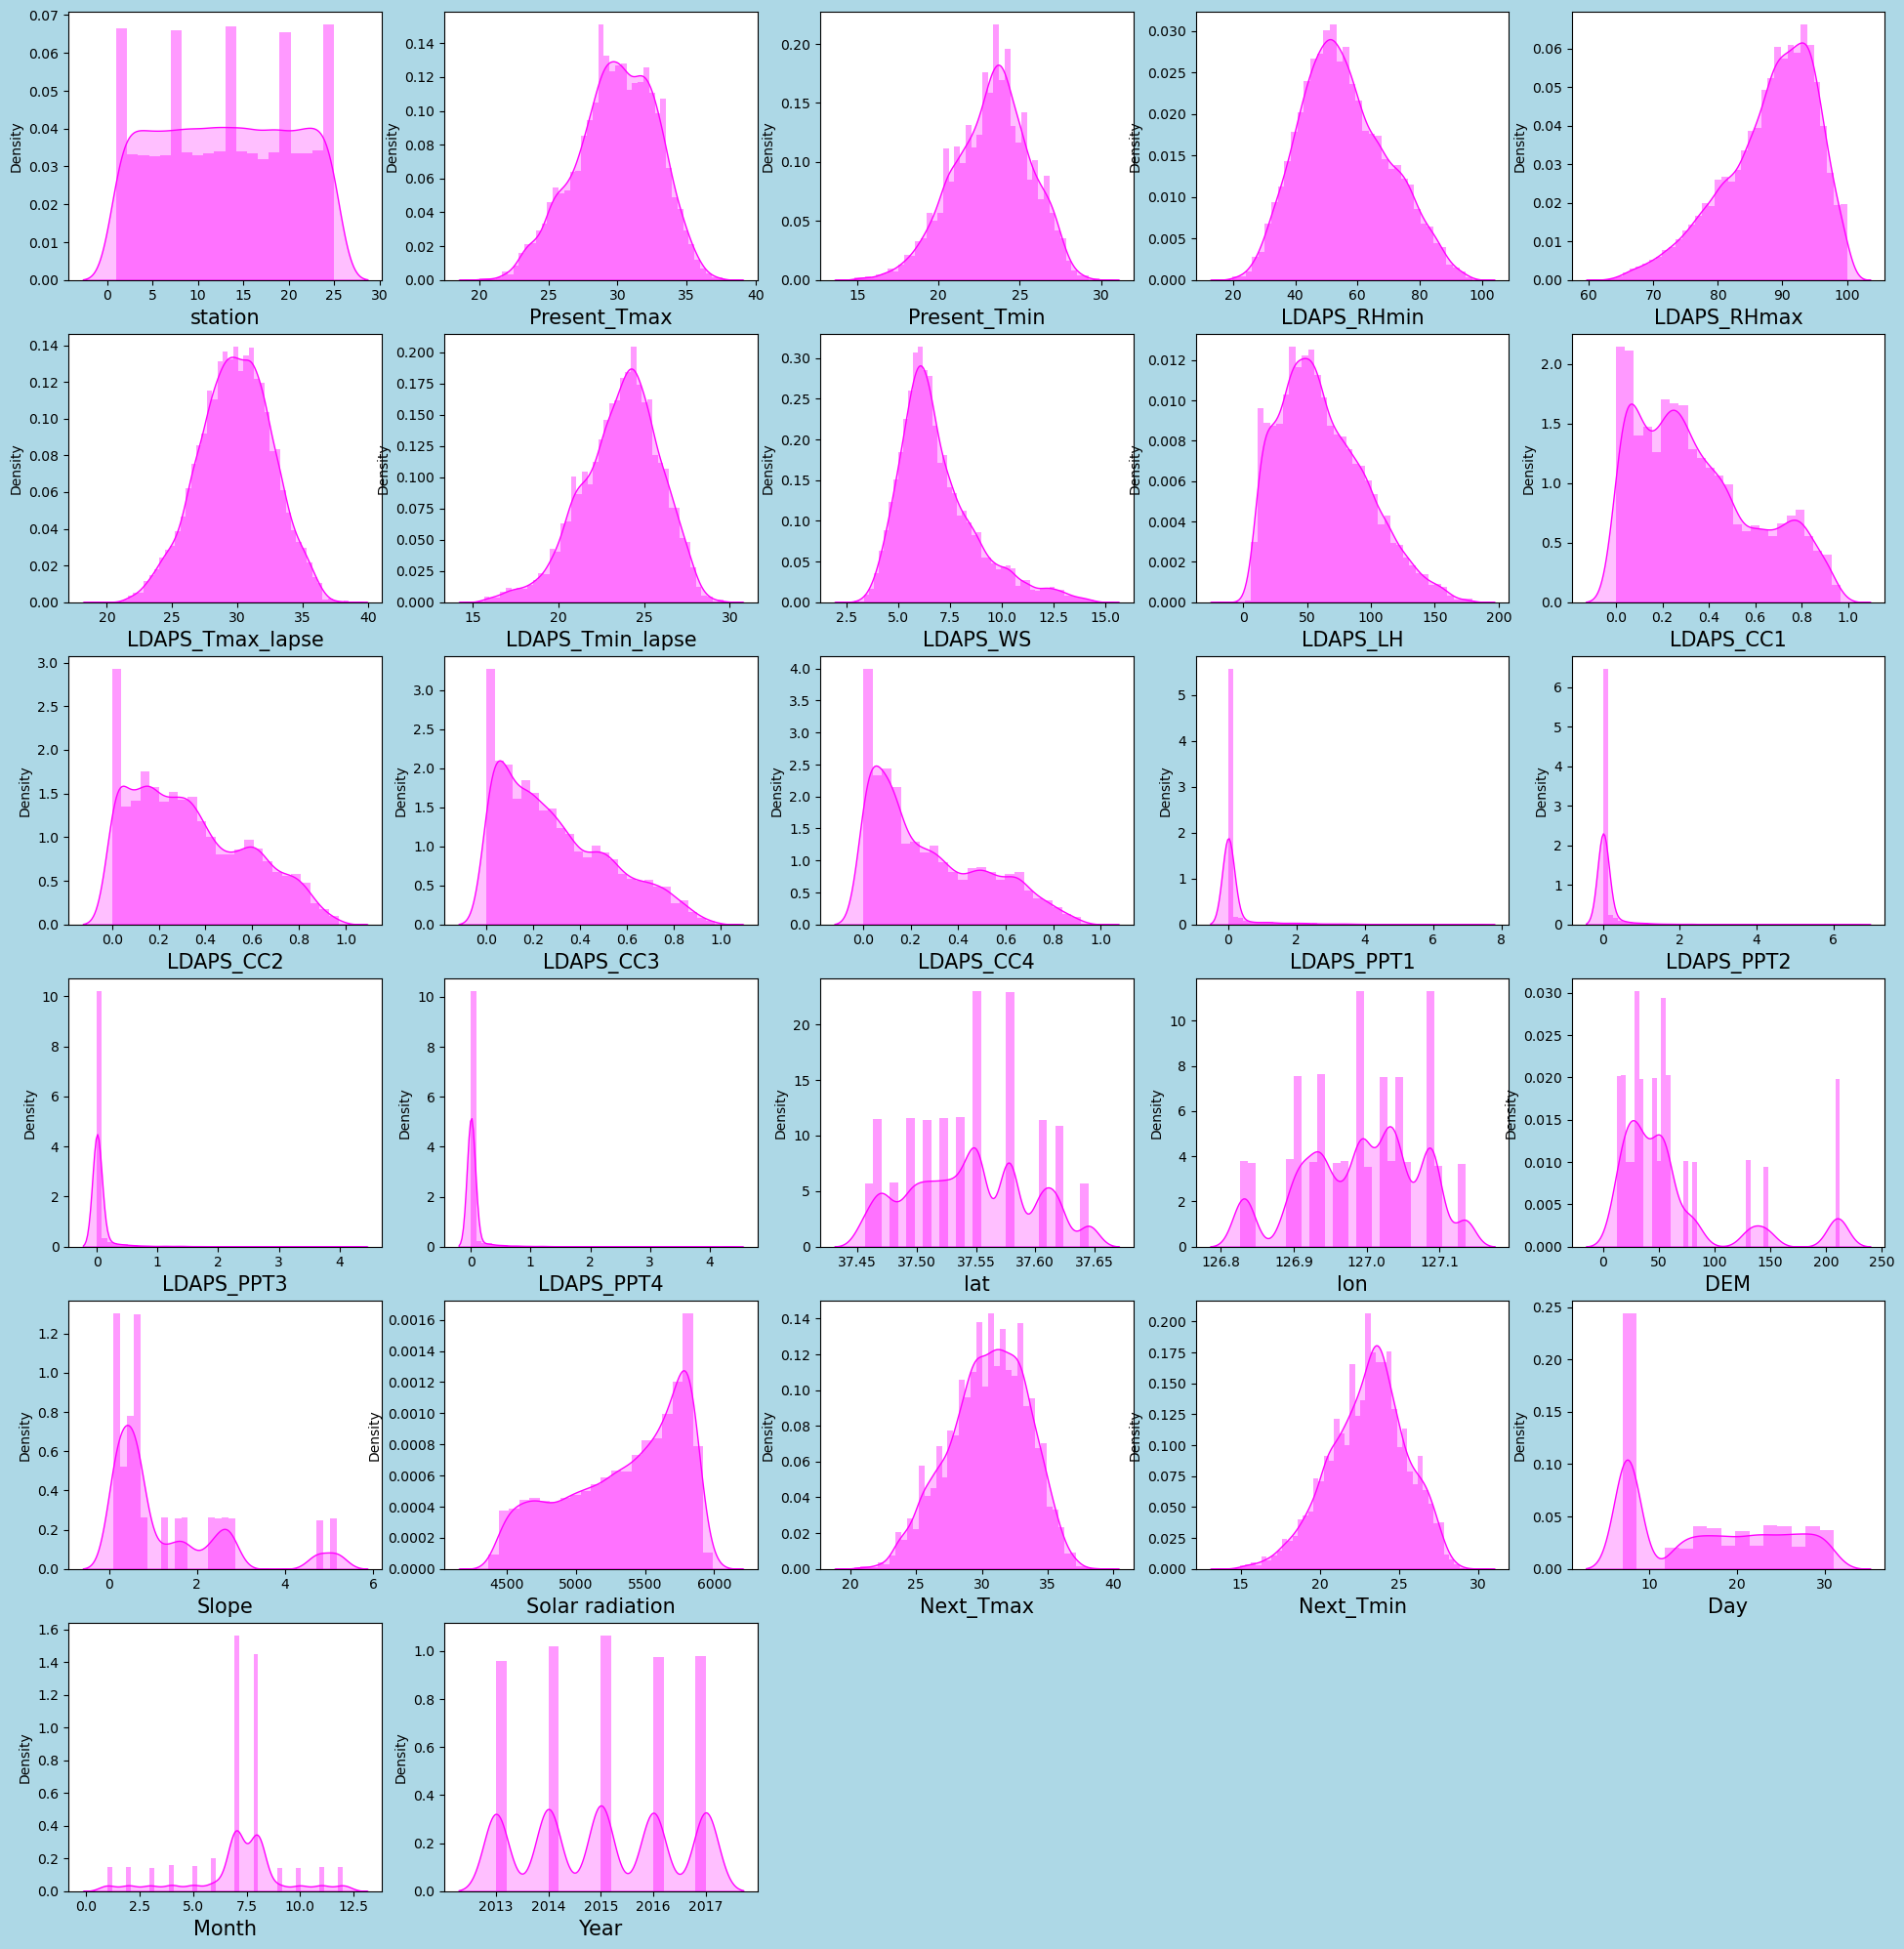

In [164]:
pt.figure(figsize=(24,25),facecolor='lightblue')
ptno=1

for c in df1:
    if ptno<=28:
        ax=pt.subplot(6,5,ptno)
        sb.distplot(df1[c],color='magenta',kde_kws={"shade": True})
        pt.xlabel(c,fontsize=15)
        
    ptno+=1
df1.skew()

We can see that there is some skewness present in the columns , so we will remove skewness from feature columns and try to bring the skewness within the acceptance range which is (-0.5-0.5)

In [8]:
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method = 'yeo-johnson')
s=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']
x=df1.drop(columns=['Next_Tmin'])
y=df1['Next_Tmin']

In [9]:
df1[s] = yj.fit_transform(df1[s].values)

In [167]:
df1.skew()

station            -0.003134
Present_Tmax       -0.295735
Present_Tmin       -0.300269
LDAPS_RHmin         0.317694
LDAPS_RHmax        -0.759415
LDAPS_Tmax_lapse   -0.143238
LDAPS_Tmin_lapse   -0.476199
LDAPS_WS            1.157554
LDAPS_LH            0.613055
LDAPS_CC1           0.564380
LDAPS_CC2           0.499229
LDAPS_CC3           0.693125
LDAPS_CC4           0.703111
LDAPS_PPT1          1.564021
LDAPS_PPT2          1.785298
LDAPS_PPT3          1.948233
LDAPS_PPT4          2.222658
lat                 0.095423
lon                -0.279686
DEM                 0.039876
Slope               0.233948
Solar radiation    -0.523191
Next_Tmax          -0.292374
Next_Tmin          -0.313213
Day                 0.246323
Month              -0.685973
Year                0.011720
dtype: float64

We can see that the data is less skewed now

## Standard Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
x1=pd.DataFrame(scaled_x,columns=x.columns)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(x1.values,i)
                    for i in range(len(x1.columns))]
vif["features"]=x1.columns
vif

,Vif values,features
0,1.240254,station
1,2.857732,Present_Tmax
2,3.147128,Present_Tmin
3,5.978959,LDAPS_RHmin
4,2.294504,LDAPS_RHmax
5,8.312812,LDAPS_Tmax_lapse
6,7.064391,LDAPS_Tmin_lapse
7,1.277185,LDAPS_WS
8,1.594456,LDAPS_LH
9,3.571792,LDAPS_CC1


As all the VIF values are less than 10 we can proceed with the data.

## Selecting the best random state 

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score

In [13]:
models_reg=[LinearRegression(),Ridge(),Lasso(),SVR(),XGBRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor()]

In [172]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size = .25, random_state=i)
    for m in models_reg:
        m.fit(xtrain,ytrain)
        pred = m.predict(xtest)
        acc = r2_score(ytest,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9433658042995223 on Random State: 12


So the best random state is 12

In [14]:
 x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = .25, random_state=12)

## Every regression model with their metrics

In [15]:
for m in models_reg:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred))
    cvs=cross_val_score(m,x1,y)
    print('Cross Validation Score=',cvs.mean(),'\n')

 For LinearRegression() 
R2 score : 0.8446665295436752
Mean absolute error:  0.7571080480864681
Mean squared error:  0.8729224502411541
Cross Validation Score= 0.7913272079186007 

 For Ridge() 
R2 score : 0.84465685787391
Mean absolute error:  0.7571340909036457
Mean squared error:  0.8729768018090714
Cross Validation Score= 0.7913520253645476 

 For Lasso() 
R2 score : 0.5911284671077666
Mean absolute error:  1.2203394491243886
Mean squared error:  2.2977220510018697
Cross Validation Score= 0.5335445672668998 

 For SVR() 
R2 score : 0.9165700456287873
Mean absolute error:  0.5214377466947612
Mean squared error:  0.4688486002358627
Cross Validation Score= 0.7460597324924861 

 For XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_poli

From above we see that random forest and gradient boosting are almost working with the same accuracy as siggested by r2 and coss validation . We will be advancing with Random forest as it has almost the same accuracy but with less error.

## HyperParameter Tuning

In [193]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[50,60,70],'max_depth': [10,15,20],
            'criterion':['friedman_mse', 'absolute_error', 'poisson', 'squared_error'],
             'min_samples_split':[5,10,15,20],
             'max_features':["sqrt","log2"]}
gcs=GridSearchCV(RandomForestRegressor(),param,cv=5)
gcs.fit(x_train,y_train)
gcs.best_params_

{'criterion': 'poisson',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 70}

In [176]:
fmodel=RandomForestRegressor(max_features='sqrt',criterion='friedman_mse',min_samples_split=5,max_depth=20,n_estimators=70)
fmodel.fit(x_train,y_train)
pred=fmodel.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

92.06222849411542


## Plotting the best fit line

Text(0.5, 1.0, 'Best Fit Line')

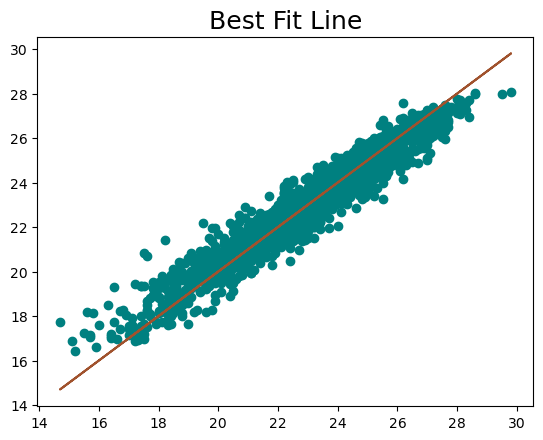

In [177]:
pt.scatter(x=y_test,y=pred,color='teal')
pt.plot(y_test,y_test,color='sienna')
pt.title('Best Fit Line',fontsize=18)

## Saving the model

In [178]:
import joblib
joblib.dump(fmodel,'Temp_Pred_Next_Tmin.obj')

['Temp_Pred_Next_Tmin.obj']

## Now we will build the model by taking column 'Next_Tmax' as our target variable

In [16]:
x=df1.drop(columns=['Next_Tmax'])
y=df1['Next_Tmax']

In [17]:
sc = StandardScaler()
scaledx = sc.fit_transform(x)
x2=pd.DataFrame(scaledx,columns=x.columns)

In [181]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size = .25, random_state=i)
    for m in models_reg:
        m.fit(xtrain,ytrain)
        pred = m.predict(xtest)
        acc = r2_score(ytest,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9339780336644514 on Random State: 12


So the best random state is 12

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.25,random_state=12)

## Every regression model with their metrics

In [19]:
for m in models_reg:
    m.fit(xtrain,ytrain)
    mpred=m.predict(xtest)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(ytest, mpred))
    print("Mean absolute error: ", mean_absolute_error(ytest,mpred))
    print("Mean squared error: ", mean_squared_error(ytest,mpred))
    cvs=cross_val_score(m,x2,y)
    print('Cross Validation Score=',cvs.mean(),'\n')

 For LinearRegression() 
R2 score : 0.7802752331246496
Mean absolute error:  1.0416222767106338
Mean squared error:  1.9130881257641397
Cross Validation Score= 0.6894632708797885 

 For Ridge() 
R2 score : 0.7802670770264267
Mean absolute error:  1.0416469335626275
Mean squared error:  1.9131591388542193
Cross Validation Score= 0.689522061853823 

 For Lasso() 
R2 score : 0.55213833041059
Mean absolute error:  1.572555792859127
Mean squared error:  3.899418596550219
Cross Validation Score= 0.4966272403537687 

 For SVR() 
R2 score : 0.8857116774039857
Mean absolute error:  0.7187874624725217
Mean squared error:  0.9950795988145146
Cross Validation Score= 0.6784740020262178 

 For XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=

From above we again see that random forest and gradient boosting are almost working with the same accuracy as siggested by r2 and coss validation . We will be advancing with Random forest as it has almost the same accuracy but with less error.

## HyperParameter Tuning

In [184]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth': [10,15,20],
            'criterion':['friedman_mse', 'absolute_error', 'poisson', 'squared_error'],
             'max_features':["auto","sqrt","log2"]}
gcs=GridSearchCV(RandomForestRegressor(),param,cv=5)
gcs.fit(xtrain,ytrain)
gcs.best_params_

{'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': 'sqrt'}

In [188]:
fmodel=RandomForestRegressor(max_features='sqrt',criterion='friedman_mse',max_depth=20,)
fmodel.fit(x_train,y_train)
pred2=fmodel.predict(x_test)
acc=r2_score(y_test,pred2)
print(acc*100)

92.17467962756628


## Plotting the best fit line

Text(0.5, 1.0, 'Best Fit Line')

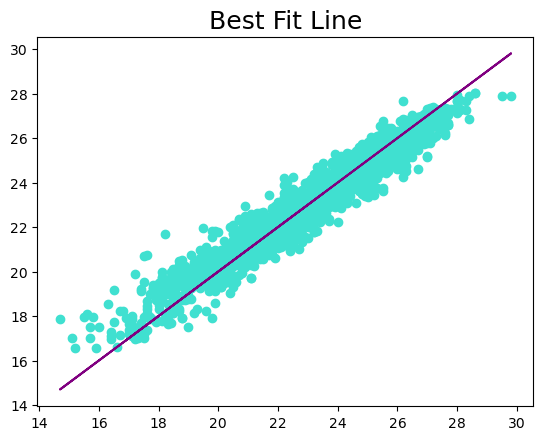

In [190]:
pt.scatter(x=y_test,y=pred2,color='turquoise')
pt.plot(y_test,y_test,color='purple')
pt.title('Best Fit Line',fontsize=18)

## Saving the model

In [192]:
import joblib
joblib.dump(fmodel,'Temp_Pred_Next_Tmin.obj')

['Temp_Pred_Next_Tmin.obj']